# Lab_1_image_generator_no_validation

In [5]:
#import paskages
import os
import zipfile

import numpy as np
import random



import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img , img_to_array

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [6]:
#Unzip data
local_zip="data/horse-or-human.zip"
zip_ref= zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/horse-or-human")
zip_ref.close()

In [8]:
train_horse_dir=os.path.join("./horse-or-human/horses")
train_human_dir = os.path.join('./horse-or-human/humans')

In [9]:
train_horse_names = os.listdir(train_horse_dir)
train_horse_names[:5]

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png']

In [9]:
train_human_names = os.listdir(train_human_dir)
train_human_names[:5]

['human01-00.png',
 'human01-01.png',
 'human01-02.png',
 'human01-03.png',
 'human01-04.png']

In [12]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [20]:
ncols=4
nrows=4

pic_index=    0

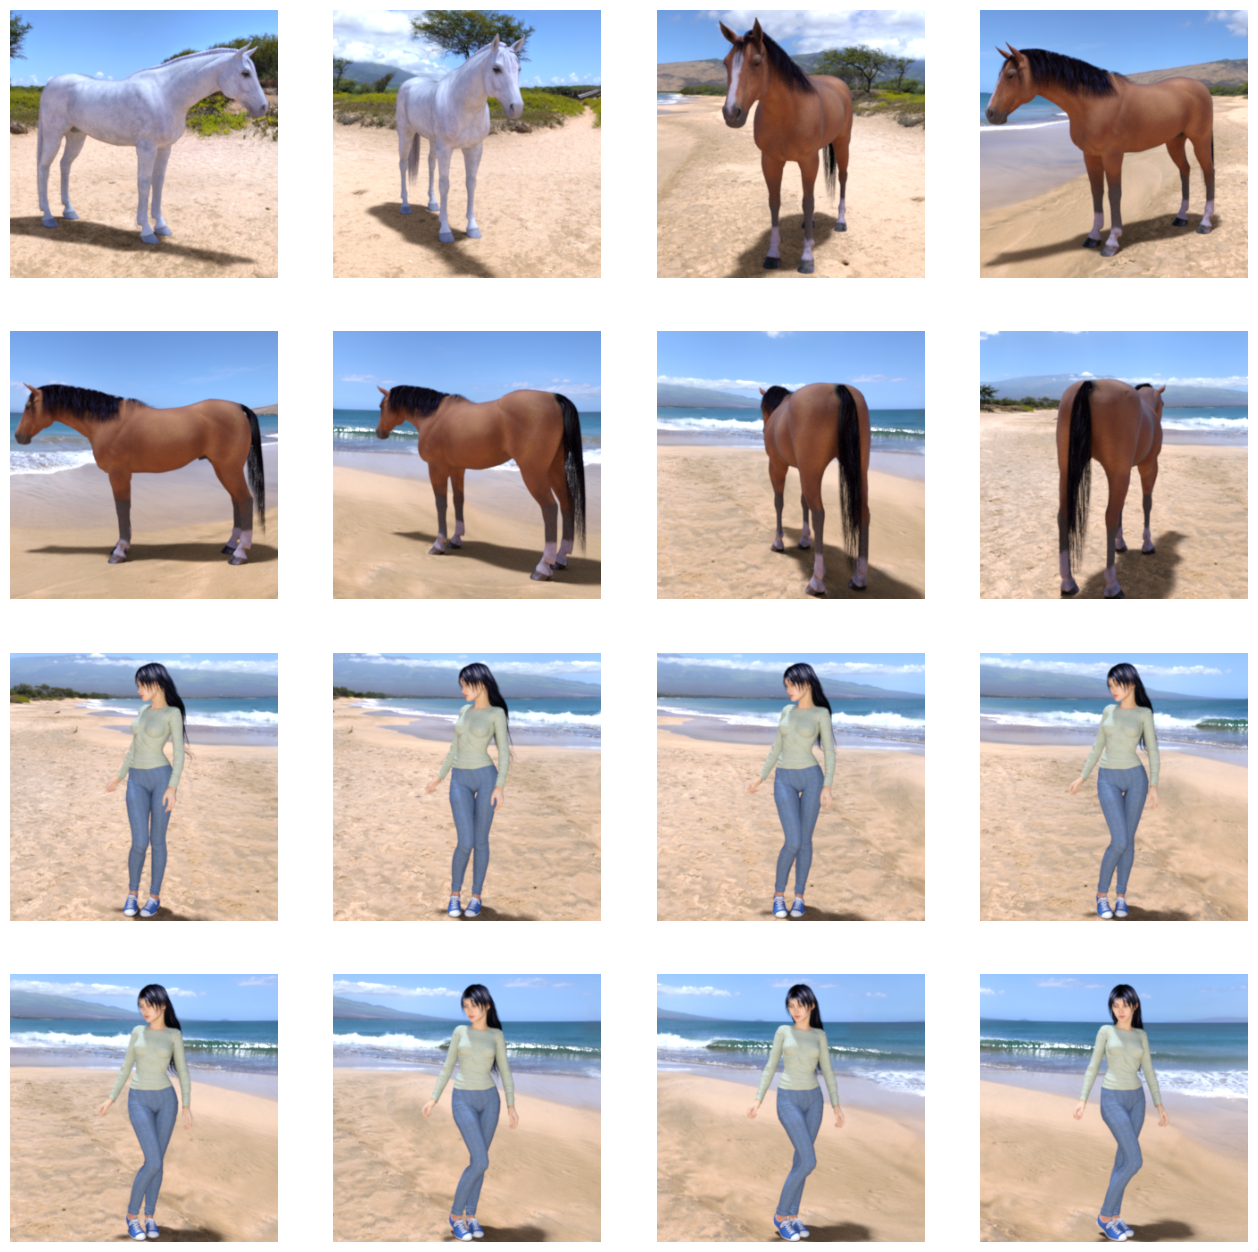

In [22]:
fig = plt.gcf()
fig.set_size_inches(ncol*4 ,nrows*4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    
    plt.imshow(img)

plt.show()

In [11]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16 , (3,3)  ,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3) , activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3) , activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])


In [12]:
model.compile(loss='binary_crossentropy' , 
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [13]:
train_datagen =ImageDataGenerator(rescale=1/255)

In [14]:
train_generator=train_datagen.flow_from_directory(
              './horse-or-human/',
    target_size=(300,300),
    batch_size=(128),
        class_mode='binary')


Found 1027 images belonging to 2 classes.


In [15]:
history=model.fit(train_generator ,steps_per_epoch=4, epochs=15)

Epoch 1/15
4/4 [==============================] - 22s 5s/step - loss: 0.8671 - accuracy: 0.5430
Epoch 2/15
4/4 [==============================] - 26s 6s/step - loss: 0.7231 - accuracy: 0.6172
Epoch 3/15
4/4 [==============================] - 21s 5s/step - loss: 0.6662 - accuracy: 0.6305
Epoch 4/15
4/4 [==============================] - 27s 6s/step - loss: 0.6784 - accuracy: 0.7070
Epoch 5/15
4/4 [==============================] - 20s 4s/step - loss: 0.9345 - accuracy: 0.5711
Epoch 6/15
4/4 [==============================] - 21s 5s/step - loss: 0.6140 - accuracy: 0.6641
Epoch 7/15
4/4 [==============================] - 24s 6s/step - loss: 0.6302 - accuracy: 0.7070
Epoch 8/15
4/4 [==============================] - 18s 4s/step - loss: 0.3549 - accuracy: 0.8837
Epoch 9/15
4/4 [==============================] - 24s 6s/step - loss: 0.4790 - accuracy: 0.8809
Epoch 10/15
4/4 [==============================] - 22s 5s/step - loss: 0.2548 - accuracy: 0.9147
Epoch 11/15
4/4 [======================

In [16]:
images = os.listdir("data//temp")
images

['hourse1.jpeg', 'hourse2.jpeg', 'human1.jpeg', 'human2.jpeg']

In [39]:
images = os.listdir("data//temp")


for i in images:
    #predicting images
    path = 'data//temp//' + i
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)


    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(i + " is a human")
    else:
        print(i + " is a horse")

1/1 [==============================] - 0s 31ms/step
[0.13010158]
hourse1.jpeg is a horse
1/1 [==============================] - 0s 38ms/step
[2.1575286e-06]
hourse2.jpeg is a horse
1/1 [==============================] - 0s 29ms/step
[0.99994075]
human1.jpeg is a human
1/1 [==============================] - 0s 40ms/step
[0.9987496]
human2.jpeg is a human
